In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import os
import time

In [2]:
data = pd.read_csv("C:\\Users\\plutzer\\Box\\CellBio-MajorLab\\Users\\Isaac\\Experiments\\035_SSandGSK3B_kingfisher_phospho\\Processed_data\\testdf.csv")
data

,Unnamed: 0,Protein.Group,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,GFP_1,GFP_2,GFP_3,...,Untransfected_2,Untransfected_3,Untransfected_4,SerumStarve_1,SerumStarve_2,SS_Rescue_1,SS_Rescue_2,Unstarved_1,Unstarved_2,Pooled_1
0,0,A0A096LP01,SIM26_HUMAN,SMIM26,Small integral membrane protein 26,2,2,5.451532,5.417531,5.389460,...,5.627952,5.631019,5.576414,5.621621,5.662355,5.363736,5.672088,5.735048,5.687945,5.615982
1,1,A0A0B4J2D5;P0DPI2,GAL3A_HUMAN;GAL3B_HUMAN,GATD3;GATD3B,Putative glutamine amidotransferase-like class...,12,0,7.866774,7.903794,7.895104,...,7.804907,7.863411,7.878756,7.843544,7.894517,7.897420,7.829151,7.993036,7.951671,7.890891
2,2,A0A0B4J2F0,PIOS1_HUMAN,PIGBOS1,Protein PIGBOS1,1,1,5.487907,5.682846,NaN,...,5.696221,5.576747,NaN,5.715063,5.784719,5.719822,5.789090,5.672852,5.616887,5.360607
3,3,A0A1W2PQ72,MSD7_HUMAN,MSANTD7,Myb/SANT-like DNA-binding domain-containing pr...,6,6,4.371750,NaN,4.200321,...,4.419754,4.413939,4.346306,4.659801,4.605484,4.508817,4.554514,4.583769,4.492025,4.417436
4,4,A0A2Z4LIS9,FXO3B_HUMAN,FOXO3B,Forkhead box protein O3B,4,1,5.056412,4.977790,4.972270,...,4.935802,4.957549,4.960477,4.951259,4.852922,4.772215,4.884831,4.756676,5.044018,5.063590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,8117,Q9Y6X5,ENPP4_HUMAN,ENPP4,Bis(5'-adenosyl)-triphosphatase ENPP4,5,5,5.527828,5.491365,5.560095,...,5.550633,5.548855,5.495342,5.503919,5.541946,5.661644,5.618305,5.508668,5.631733,5.514657
8118,8118,Q9Y6X8,ZHX2_HUMAN,ZHX2,Zinc fingers and homeoboxes protein 2,11,10,6.394972,6.415668,6.407520,...,6.492699,6.456309,6.499791,6.443213,6.479206,6.458312,6.487638,6.475095,6.354656,6.503512
8119,8119,Q9Y6X9,MORC2_HUMAN,MORC2,ATPase MORC2,24,23,6.278637,6.312998,6.270747,...,6.344709,6.372204,6.331338,6.378089,6.402234,6.350073,6.375493,6.336246,6.331244,6.312258
8120,8120,Q9Y6Y0,NS1BP_HUMAN,IVNS1ABP,Influenza virus NS1A-binding protein,10,10,5.882298,5.912555,5.854728,...,5.955424,6.014379,5.973242,5.903545,5.941313,5.812193,5.900569,5.871059,6.018622,5.974950


In [3]:
quant_cols = ['GFP_1', 'GFP_2', 'GFP_3', 'GFP_4', 'GSK3B_1', 'GSK3B_2', 'GSK3B_3', 'GSK3B_4', 'Untransfected_1', 'Untransfected_2', 'Untransfected_3', 'Untransfected_4', 'SerumStarve_1', 'SerumStarve_2', 'SS_Rescue_1', 'SS_Rescue_2', 'Unstarved_1', 'Unstarved_2', 'Pooled_1']
data = data[quant_cols]
data

,GFP_1,GFP_2,GFP_3,GFP_4,GSK3B_1,GSK3B_2,GSK3B_3,GSK3B_4,Untransfected_1,Untransfected_2,Untransfected_3,Untransfected_4,SerumStarve_1,SerumStarve_2,SS_Rescue_1,SS_Rescue_2,Unstarved_1,Unstarved_2,Pooled_1
0,5.451532,5.417531,5.389460,5.337876,5.489433,5.382001,5.327154,5.572084,5.596333,5.627952,5.631019,5.576414,5.621621,5.662355,5.363736,5.672088,5.735048,5.687945,5.615982
1,7.866774,7.903794,7.895104,7.845066,7.894301,7.873327,7.855781,7.881419,7.878569,7.804907,7.863411,7.878756,7.843544,7.894517,7.897420,7.829151,7.993036,7.951671,7.890891
2,5.487907,5.682846,NaN,NaN,5.351803,5.609497,NaN,5.708673,5.250185,5.696221,5.576747,NaN,5.715063,5.784719,5.719822,5.789090,5.672852,5.616887,5.360607
3,4.371750,NaN,4.200321,4.413978,4.177049,4.299196,4.511828,4.484472,4.321971,4.419754,4.413939,4.346306,4.659801,4.605484,4.508817,4.554514,4.583769,4.492025,4.417436
4,5.056412,4.977790,4.972270,5.013242,4.914297,4.987966,4.831091,4.959466,5.069244,4.935802,4.957549,4.960477,4.951259,4.852922,4.772215,4.884831,4.756676,5.044018,5.063590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,5.527828,5.491365,5.560095,5.551886,5.557083,5.540859,5.570112,5.516487,5.509699,5.550633,5.548855,5.495342,5.503919,5.541946,5.661644,5.618305,5.508668,5.631733,5.514657
8118,6.394972,6.415668,6.407520,6.424145,6.394701,6.441441,6.489333,6.443789,6.521875,6.492699,6.456309,6.499791,6.443213,6.479206,6.458312,6.487638,6.475095,6.354656,6.503512
8119,6.278637,6.312998,6.270747,6.278417,6.276340,6.287709,6.296113,6.313619,6.366724,6.344709,6.372204,6.331338,6.378089,6.402234,6.350073,6.375493,6.336246,6.331244,6.312258
8120,5.882298,5.912555,5.854728,5.858316,5.882158,5.919417,5.926010,5.931827,6.014364,5.955424,6.014379,5.973242,5.903545,5.941313,5.812193,5.900569,5.871059,6.018622,5.974950


<Axes: >

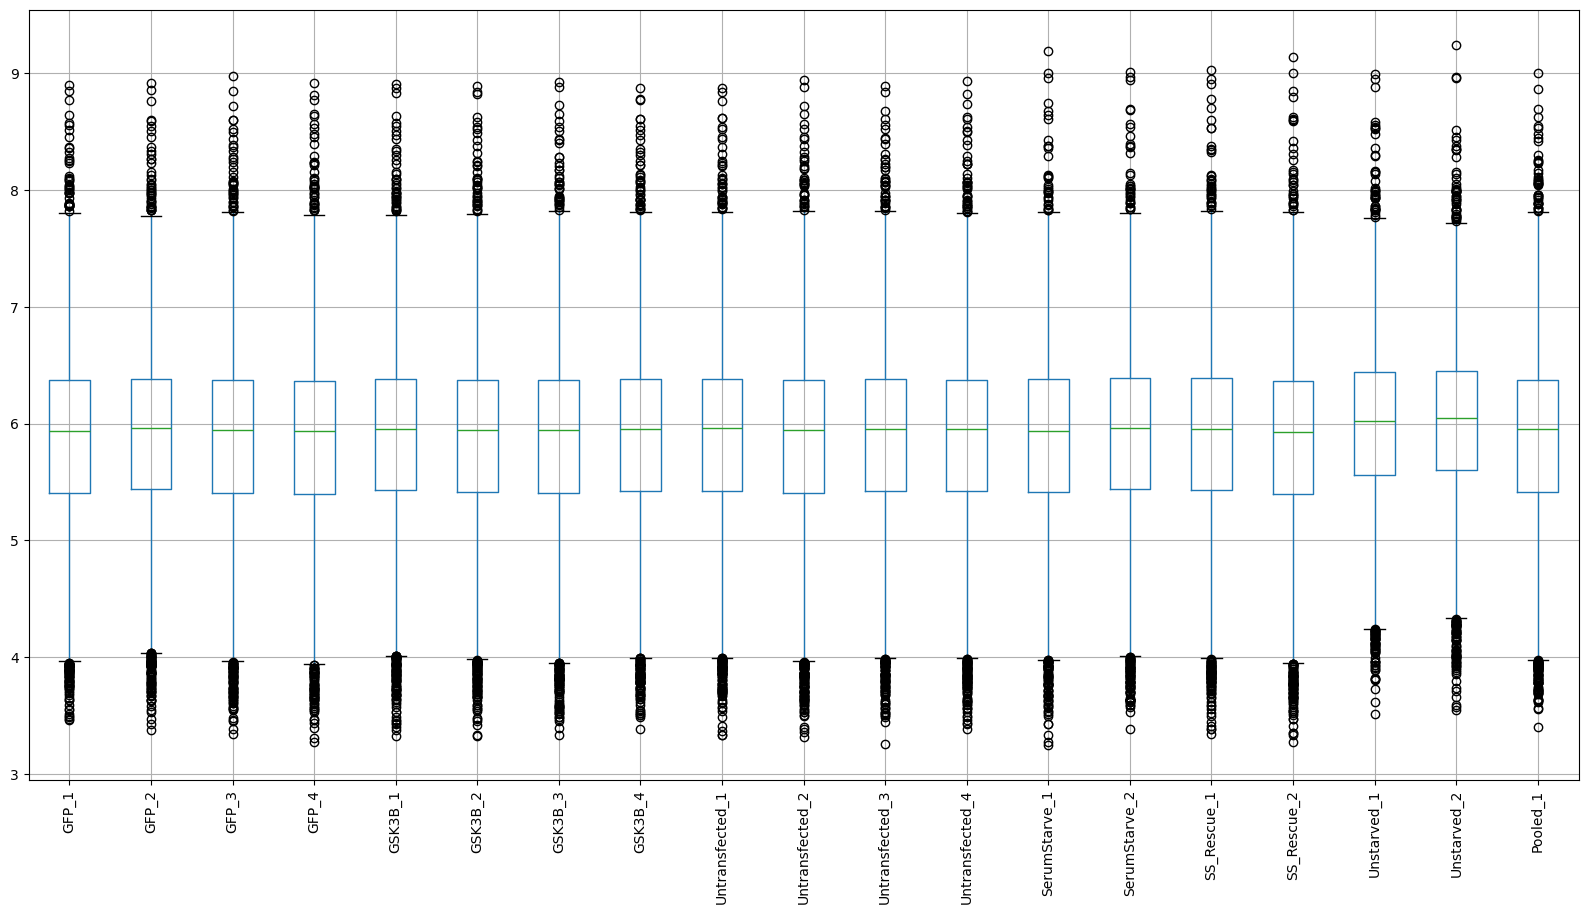

In [4]:
data.boxplot(figsize=(20, 10), rot=90)